# Exploratory Data Analysis (EDA)  - AIR QUALITY in INDIA (2015 - 2020)

![](https://i.guim.co.uk/img/media/efafbbda64a4245a9a2c5264d3d55b4517a8410b/48_13_2484_1492/master/2484.jpg?width=1200&height=900&quality=85&auto=format&fit=crop&s=27620aa44909f87000433edefcf3f744)

Exploratory Data Analysis (EDA) is the process of exploring, investigating and gathering insights from data using statistical measures and visualizations. The objective of EDA is to develop and understanding of data, by uncovering trends, relationships and patterns. 

EDA is both a science and an art. On the one hand it requires the knowledge of statistics, visualization techniques and data analysis tools like Numpy, Pandas, Seaborn etc. On the other hand, it requires asking interesting questions to guide the investigation and interpreting numbers & figures to generate useful insights.

In [1]:
!pip install jovian --quiet --upgrade

In [2]:
import jovian

In [3]:
jovian.commit(project = 'air-quality-eda')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "mohitdsingh/air-quality-eda" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/mohitdsingh/air-quality-eda


'https://jovian.ai/mohitdsingh/air-quality-eda'

The following topics are covered in this project:

- Downloading a dataset from an online source kaggel.com on [air-quality-index  of india](https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india)
- Data preparation and cleaning with Pandas
- Open-ended exploratory analysis and visualization
- Asking and answering interesting questions
- Summarizing inferences and drawing conclusions

In [4]:
#installing libararies
!pip install numpy pandas wordcloud jovian opendatasets matplotlib seaborn plotly folium --upgrade --quiet

In [5]:
import pandas as pd
import numpy as np
import wordcloud
import opendatasets as od
import os
import matplotlib.pyplot as plt
import plotly.express as px
import folium
import seaborn as sns
import matplotlib.ticker as ticker

In [6]:
# Air quality data download
dataset_url = 'https://www.kaggle.com/datasets/rohanrao/air-quality-data-in-india'
od.download(dataset_url)

Skipping, found downloaded files in ".\air-quality-data-in-india" (use force=True to force download)


In [7]:
#Loading the data for city data collected by days and hours using pandas
raw_city_day_df = pd.read_csv(".\\air-quality-data-in-india\\city_day.csv", parse_dates=['Date'], dayfirst=True)
raw_city_day_df
raw_city_hour_df = pd.read_csv('.\\air-quality-data-in-india\\city_hour.csv', parse_dates=['Datetime'], dayfirst=True)
raw_city_hour_df

,City,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01 01:00:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
1,Ahmedabad,2015-01-01 02:00:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
2,Ahmedabad,2015-01-01 03:00:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
3,Ahmedabad,2015-01-01 04:00:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
4,Ahmedabad,2015-01-01 05:00:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
707870,Visakhapatnam,2020-06-30 20:00:00,9.50,36.00,2.75,25.57,15.85,4.57,0.62,NaN,27.75,NaN,NaN,NaN,51.0,Satisfactory
707871,Visakhapatnam,2020-06-30 21:00:00,17.25,49.25,3.62,33.20,20.62,3.78,0.76,2.02,25.58,NaN,NaN,NaN,51.0,Satisfactory
707872,Visakhapatnam,2020-06-30 22:00:00,36.00,71.00,2.20,30.80,18.20,3.67,0.58,1.77,26.15,NaN,NaN,NaN,50.0,Good
707873,Visakhapatnam,2020-06-30 23:00:00,15.75,63.00,1.02,28.90,16.00,3.80,0.49,0.75,15.82,NaN,NaN,NaN,50.0,Good


In [8]:
#lets get copy of the data before we do any changes or anylsis further
city_day_df = raw_city_day_df.copy()
print(city_day_df.shape)
city_hour_df = raw_city_hour_df.copy()
print(city_hour_df.shape)

(29531, 16)
(707875, 16)


In [9]:
#Loading datasets for stations collected over period of time
raw_stations = pd.read_csv("air-quality-data-in-india/stations.csv")
print(stations.shape)
raw_stations_per_day = pd.read_csv("air-quality-data-in-india/station_day.csv",parse_dates=['Date'], dayfirst=True)
stations_day

    StationId                                     StationName  \
0       AP001                  Secretariat, Amaravati - APPCB   
1       AP002  Anand Kala Kshetram, Rajamahendravaram - APPCB   
2       AP003                      Tirumala, Tirupati - APPCB   
3       AP004                 PWD Grounds, Vijayawada - APPCB   
4       AP005          GVM Corporation, Visakhapatnam - APPCB   
..        ...                                             ...   
225     WB010                       Jadavpur, Kolkata - WBPCB   
226     WB011    Rabindra Bharati University, Kolkata - WBPCB   
227     WB012               Rabindra Sarobar, Kolkata - WBPCB   
228     WB013                       Victoria, Kolkata - WBPCB   
229     WB014              Ward-32 Bapupara, Siliguri - WBPCB   

                  City           State  Status  
0            Amaravati  Andhra Pradesh  Active  
1    Rajamahendravaram  Andhra Pradesh     NaN  
2             Tirupati  Andhra Pradesh     NaN  
3           Vijayawada 

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [10]:
stations_day.StationId.value_counts()

TN004    2009
UP012    2009
KA009    2009
DL033    2009
DL013    2009
         ... 
BR005     126
BR006     121
HR013     119
HR012     119
MZ001     113
Name: StationId, Length: 110, dtype: int64

In [11]:
#Let's merge the station data
station_day = pd.merge(left = stations, right = stations_day, on = 'StationId')
station_day

,StationId,StationName,City,State,Status,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-24,71.36,115.75,1.75,20.65,12.40,12.19,0.10,10.76,109.26,0.17,5.92,0.10,NaN,NaN
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-25,81.40,124.50,1.44,20.50,12.08,10.72,0.12,15.24,127.09,0.20,6.50,0.06,184.0,Moderate
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-26,78.32,129.06,1.26,26.00,14.85,10.28,0.14,26.96,117.44,0.22,7.95,0.08,197.0,Moderate
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-27,88.76,135.32,6.60,30.85,21.77,12.91,0.11,33.59,111.81,0.29,7.63,0.12,198.0,Moderate
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-28,64.18,104.09,2.56,28.07,17.01,11.42,0.09,19.00,138.18,0.17,5.02,0.07,188.0,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-27,8.65,16.46,NaN,NaN,NaN,NaN,0.69,4.36,30.59,1.32,7.26,NaN,50.0,Good
108031,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-28,11.80,18.47,NaN,NaN,NaN,NaN,0.68,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory
108032,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-29,18.60,32.26,13.65,200.87,214.20,11.40,0.78,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory
108033,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-30,16.07,39.30,7.56,29.13,36.69,29.26,0.69,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory


In [12]:
station_day['month'] = station_day.Date.dt.month_name()
station_day['Year'] = station_day.Date.dt.year
station_day['year_month'] = station_day["Date"].dt.to_period('M')
station_day

,StationId,StationName,City,State,Status,Date,PM2.5,PM10,NO,NO2,...,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Year,year_month
0,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-24,71.36,115.75,1.75,20.65,...,10.76,109.26,0.17,5.92,0.10,NaN,NaN,November,2017,2017-11
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-25,81.40,124.50,1.44,20.50,...,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,November,2017,2017-11
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-26,78.32,129.06,1.26,26.00,...,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,November,2017,2017-11
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-27,88.76,135.32,6.60,30.85,...,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,November,2017,2017-11
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-28,64.18,104.09,2.56,28.07,...,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,November,2017,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-27,8.65,16.46,NaN,NaN,...,4.36,30.59,1.32,7.26,NaN,50.0,Good,June,2020,2020-06
108031,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-28,11.80,18.47,NaN,NaN,...,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory,June,2020,2020-06
108032,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-29,18.60,32.26,13.65,200.87,...,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory,June,2020,2020-06
108033,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-30,16.07,39.30,7.56,29.13,...,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory,June,2020,2020-06


In [13]:
station_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 108035 entries, 0 to 108034
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   StationId    108035 non-null  object        
 1   StationName  108035 non-null  object        
 2   City         108035 non-null  object        
 3   State        108035 non-null  object        
 4   Status       107711 non-null  object        
 5   Date         108035 non-null  datetime64[ns]
 6   PM2.5        86410 non-null   float64       
 7   PM10         65329 non-null   float64       
 8   NO           90929 non-null   float64       
 9   NO2          91488 non-null   float64       
 10  NOx          92535 non-null   float64       
 11  NH3          59930 non-null   float64       
 12  CO           95037 non-null   float64       
 13  SO2          82831 non-null   float64       
 14  O3           82467 non-null   float64       
 15  Benzene      76580 non-null   floa

In [14]:
print(raw_city_day_df.shape)
print(raw_city_hour_df.shape)
print(station_day.shape)

(29531, 16)
(707875, 16)
(108035, 23)


We Have 29.5k rows of data and 16 columns in day, we will proceed with data by `day`

In [15]:
city_day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   NO2         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

To understand which column to deal with first we've to understand `how AQI is calculated`, According to which we can deal with columns data, Also to `note` we've to deal this for month by month according to season beacuse there can be a lot of variability from rainy to winter season.

[**How is AQI calculated?**](https://www.cpcb.nic.in/displaypdf.php?id=bmF0aW9uYWwtYWlyLXF1YWxpdHktaW5kZXgvSG93X0FRSV9DYWxjdWxhdGVkLnBkZg==)

1. The Sub-indices for individual pollutants at a monitoring location are calculated using its
24-hourly average concentration value (8-hourly in case of CO and O3) and health
breakpoint concentration range. The worst sub-index is the AQI for that location.
2. All the eight pollutants may not be monitored at all the locations. Overall AQI is
calculated only if data are available for minimum three pollutants out of which one should
necessarily be either PM2.5 or PM10. Else, data are considered insufficient for calculating
AQI. Similarly, `a minimum of 16 hours’ data is considered necessary for calculating subindex`.
3. The sub-indices for monitored pollutants are calculated and disseminated, even if data are
inadequate for determining AQI. The Individual pollutant-wise sub-index will provide air
quality status for that pollutant.
4. The web-based system is designed to provide AQI on real time basis. It is an automated
system that captures data from continuous monitoring stations without human
intervention, and displays AQI based on running average values (e.g. AQI at 6am on a
day will incorporate data from 6am on previous day to the current day).
5. For manual monitoring stations, an AQI calculator is developed wherein data can be fed
manually to get AQI value. 


- Hence according to point 2 of above cell for atleast three pollutants are considered necessry to calculate the AQI.

- one of the three pollutants should be PM2.5 or PM10

Let's check for Missing values of AQI, and chech whether pollutants are there to calculate or not.

In [16]:
city_day_df[city_day_df.AQI.isna()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29374,Visakhapatnam,2020-01-27,59.32,117.45,3.11,19.17,12.72,11.62,0.92,8.35,29.25,3.13,7.13,1.00,NaN,NaN
29400,Visakhapatnam,2020-02-22,31.82,70.91,2.34,23.92,14.56,12.41,0.58,7.58,26.08,2.59,5.82,1.15,NaN,NaN
29409,Visakhapatnam,2020-03-02,52.80,104.45,3.24,43.27,24.56,17.49,1.24,9.08,17.61,4.44,9.25,2.75,NaN,NaN
29463,Visakhapatnam,2020-04-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Well it looks like for some PM10 and PM2.5 was not there and for some more than three pollutants were present. Let's find with logical `&` exact `AQI rows not valid for calculations`.

In [17]:
NA_values_AQI = city_day_df[city_day_df.AQI.isna() & (city_day_df.PM10.isna() & city_day_df['PM2.5'].isna())]
NA_values_AQI

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29226,Visakhapatnam,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29227,Visakhapatnam,2019-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29228,Visakhapatnam,2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29229,Visakhapatnam,2019-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Hence out of 4681 NA values for AQI seems like 3779 of NA values are genuine, because there is insufficient data to calculate Null Values

In [18]:
insufficient_data_AQI = city_day_df[city_day_df.AQI.isna() & (city_day_df.PM10.isna() & city_day_df['PM2.5'].isna())]

In [19]:
insufficient_data_AQI

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29226,Visakhapatnam,2019-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29227,Visakhapatnam,2019-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29228,Visakhapatnam,2019-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29229,Visakhapatnam,2019-09-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's drop the values which not qualify for calculation.

In [20]:
print("The percent of data which is not valid are: {:.2f}%".format(insufficient_data_AQI.shape[0]/city_day_df.shape[0] * 100))

The percent of data which is not valid are: 12.80%


In [21]:
city_day_df.drop(city_day_df[city_day_df.AQI.isna() & (city_day_df['PM10'].isna() & city_day_df['PM2.5'].isna())].index, inplace = True)

In [22]:
insufficient_data_AQI.shape[0]

3779

In [23]:
#Let's check whether we've deleted the valid data or not
print("The Exact row's deleted with NaN value in both PM10 & PM2.5 is:",raw_city_day_df.shape[0] - city_day_df.shape[0])
city_day_df[city_day_df.AQI.isna() & (city_day_df['PM10'].isna() & city_day_df['PM2.5'].isna())] #All data with insufficient data is deleted

The Exact row's deleted with NaN value in both PM10 & PM2.5 is: 3779


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


In [24]:
city_day_df.shape

(25752, 16)

In [25]:
# Let's check for other null values where data is present stil AQI is missing
insufficient_data_AQI = city_day_df[city_day_df.AQI.isna()]
insufficient_data_AQI

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
27,Ahmedabad,2015-01-28,73.24,NaN,5.72,21.11,25.84,NaN,5.72,36.52,62.42,0.03,0.01,1.41,NaN,NaN
59,Ahmedabad,2015-03-01,61.12,NaN,3.58,16.81,20.92,NaN,3.58,28.44,30.48,2.69,1.58,1.32,NaN,NaN
65,Ahmedabad,2015-03-07,105.45,NaN,2.50,16.10,18.66,NaN,2.50,29.29,69.90,17.77,5.75,0.39,NaN,NaN
94,Ahmedabad,2015-04-05,156.76,NaN,3.92,16.70,20.97,NaN,3.92,26.32,37.11,3.88,10.78,0.97,NaN,NaN
99,Ahmedabad,2015-04-10,134.60,NaN,5.90,26.27,28.70,NaN,5.90,34.53,7.00,0.00,0.00,0.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29346,Visakhapatnam,2019-12-30,44.79,NaN,3.22,35.67,21.58,11.14,1.06,9.71,77.40,4.41,7.69,2.16,NaN,NaN
29374,Visakhapatnam,2020-01-27,59.32,117.45,3.11,19.17,12.72,11.62,0.92,8.35,29.25,3.13,7.13,1.00,NaN,NaN
29400,Visakhapatnam,2020-02-22,31.82,70.91,2.34,23.92,14.56,12.41,0.58,7.58,26.08,2.59,5.82,1.15,NaN,NaN
29409,Visakhapatnam,2020-03-02,52.80,104.45,3.24,43.27,24.56,17.49,1.24,9.08,17.61,4.44,9.25,2.75,NaN,NaN


**let's see how to [calculate AQI](https://www.cpcb.nic.in/upload/national-air-quality-index/AQI-Calculator.xls)** 
![](https://i.imgur.com/vQR5Zy0.png)

Since,
- For PM2.5, PM10, SO2, NOx and NH3 the average value in last 24-hrs is used with the condition of having at least 16 values.
- For CO and O3 the maximum value in last 8-hrs is used.
- Hence it is best to drop remaining NaN value for AQI

In [26]:
#let's drop rest rows of AQI with NaN value
city_day_df.drop(city_day_df[city_day_df.AQI.isna()].index, inplace= True)

In [27]:
city_day_df[city_day_df.AQI.isna()]

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket


In [28]:
city_day_df.isnull().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
dtype: int64

In [29]:
city_day_df.shape

(24850, 16)

**Let's decide column to deal with**
- PM2.5 has very low missing value of data so we will find their distribution according to the month and weill replace with the closest value.

- PM10 will try to do same for the PM10 but remeber to find AQI we need either PM2.5 or PM10, so we will look where there is PM2.5 and PM10 both missing.

- NO, NO2, CO, SO2, O3 will do same replace with mean or median according to the month the NA value belongs from.

- NOX, and NH3 we will have to look into it.

- Benzene Toluene & Xylene These are majorly industrial pollution.


In [30]:
#Lets make month column from date
new_city_day_df = city_day_df.copy()
print(city_day_df.shape,"\n"*2,new_city_day_df.shape)
new_city_day_df['year_month'] = new_city_day_df["Date"].dt.to_period('M')
new_city_day_df['month'] = new_city_day_df["Date"].dt.month_name()
new_city_day_df['Year'] = new_city_day_df["Date"].dt.year
new_city_day_df
# new_city_day_df = city_day_df['Date'].set_index()

(24850, 16) 

 (24850, 16)


,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year_month,month,Year
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor,2015-01,January,2015
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor,2015-01,January,2015
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe,2015-01,January,2015
31,Ahmedabad,2015-02-01,135.99,NaN,43.48,42.08,84.57,NaN,43.48,75.23,102.70,0.40,0.04,25.87,782.0,Severe,2015-02,February,2015
32,Ahmedabad,2015-02-02,178.33,NaN,54.56,35.31,72.80,NaN,54.56,55.04,107.38,0.46,0.06,35.61,914.0,Severe,2015-02,February,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good,2020-06,June,2020
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory,2020-06,June,2020
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory,2020-06,June,2020
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory,2020-06,June,2020


**PM2.5**

In [31]:
new_city_day_df[new_city_day_df['month'] == 'January']

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year_month,month,Year
28,Ahmedabad,2015-01-29,83.13,NaN,6.93,28.71,33.72,NaN,6.93,49.52,59.76,0.02,0.00,3.14,209.0,Poor,2015-01,January,2015
29,Ahmedabad,2015-01-30,79.84,NaN,13.85,28.68,41.08,NaN,13.85,48.49,97.07,0.04,0.00,4.81,328.0,Very Poor,2015-01,January,2015
30,Ahmedabad,2015-01-31,94.52,NaN,24.39,32.66,52.61,NaN,24.39,67.39,111.33,0.24,0.01,7.67,514.0,Severe,2015-01,January,2015
1096,Ahmedabad,2018-01-01,84.46,NaN,7.58,87.62,48.40,NaN,7.58,102.36,69.02,14.48,45.60,6.33,278.0,Poor,2018-01,January,2018
1097,Ahmedabad,2018-01-02,76.51,NaN,9.26,76.69,44.32,NaN,9.26,103.46,93.51,14.29,61.83,7.48,256.0,Poor,2018-01,January,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29373,Visakhapatnam,2020-01-26,53.30,128.35,6.90,59.38,37.20,13.41,0.94,8.17,16.86,5.99,31.46,1.52,113.0,Moderate,2020-01,January,2020
29375,Visakhapatnam,2020-01-28,52.42,136.94,20.20,48.69,42.33,11.30,1.23,11.47,18.65,5.39,10.51,2.56,115.0,Moderate,2020-01,January,2020
29376,Visakhapatnam,2020-01-29,45.66,119.24,12.63,38.39,30.68,11.53,1.14,14.41,25.39,4.64,10.96,2.32,122.0,Moderate,2020-01,January,2020
29377,Visakhapatnam,2020-01-30,45.58,105.92,16.23,45.59,33.98,11.03,1.03,15.64,24.76,4.23,9.71,2.26,105.0,Moderate,2020-01,January,2020


In [32]:
month = new_city_day_df.month.unique()
month

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

**Let's start with the visualising the distribution of the Each pollutant to understand what to use as a value to replace `NA`**

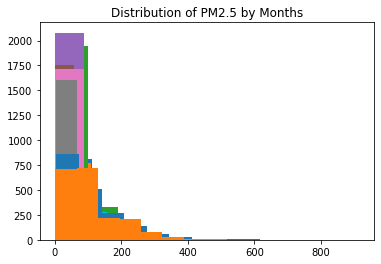

In [33]:
#distribution of PM2.5
for i in new_city_day_df.month.unique():
    plt.hist(new_city_day_df[new_city_day_df['month'] == i]['PM2.5'], stacked = True)
    plt.title("Distribution of PM2.5 by Months")

Since, stacked Histogram is looking too cluttered it is best to plot them seperately over the month

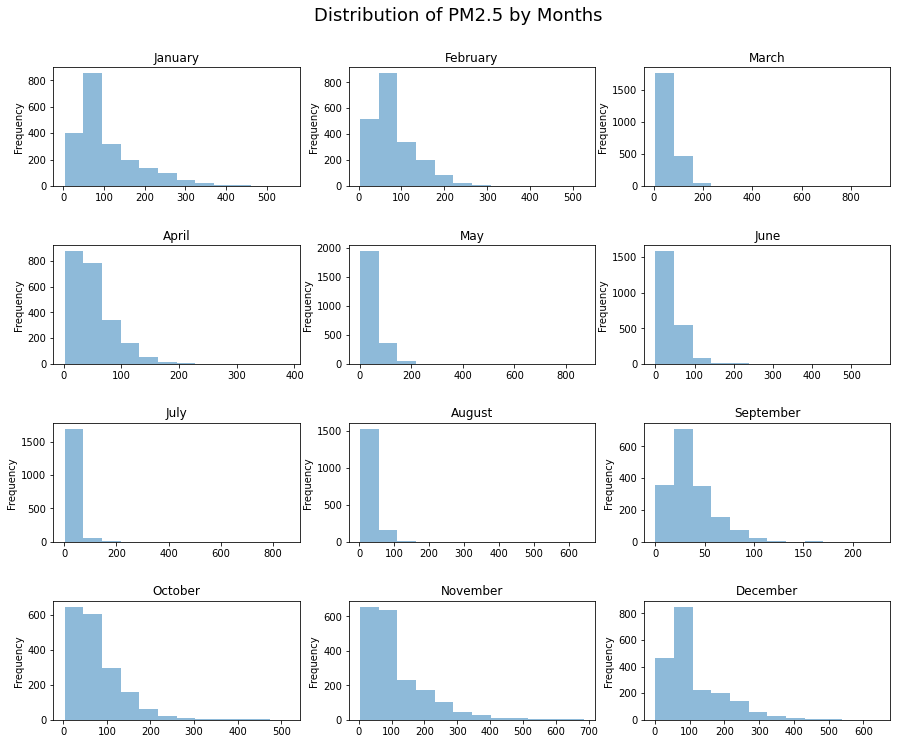

In [34]:

plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of PM2.5 by Months", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, i in enumerate(new_city_day_df.month.unique()):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n + 1)

    # filter df and plot ticker on the new subplot axis
    new_city_day_df[new_city_day_df['month'] == i]['PM2.5'].plot.hist(bins=12, alpha=0.5, ax = ax)

    # chart formatting
    ax.set_title(i)

Let's create a helper function for all the other `NA` column.

In [35]:
new_city_day_df.isnull().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
year_month        0
month             0
Year              0
dtype: int64

In [36]:
def visualizedistribution(column):
    plt.figure(figsize=(15, 12))
    plt.subplots_adjust(hspace=0.5)
    plt.suptitle(("Distribution of {} by Months".format(column)), fontsize=18, y=0.95)

    # loop through the length of month and keep track of index
    for n, i in enumerate(new_city_day_df.month.unique()):
        # add a new subplot iteratively
        ax = plt.subplot(4, 3, n + 1)

        # filter df and plot ticker on the new subplot axis
        new_city_day_df[new_city_day_df['month'] == i][column].plot.hist(bins=12, alpha=0.5, ax = ax)
    
        # chart formatting
        ax.set_title(i)

let's visualize all column with larger `NA` value with PM10, NOx, NH3, Toluene, Xylene

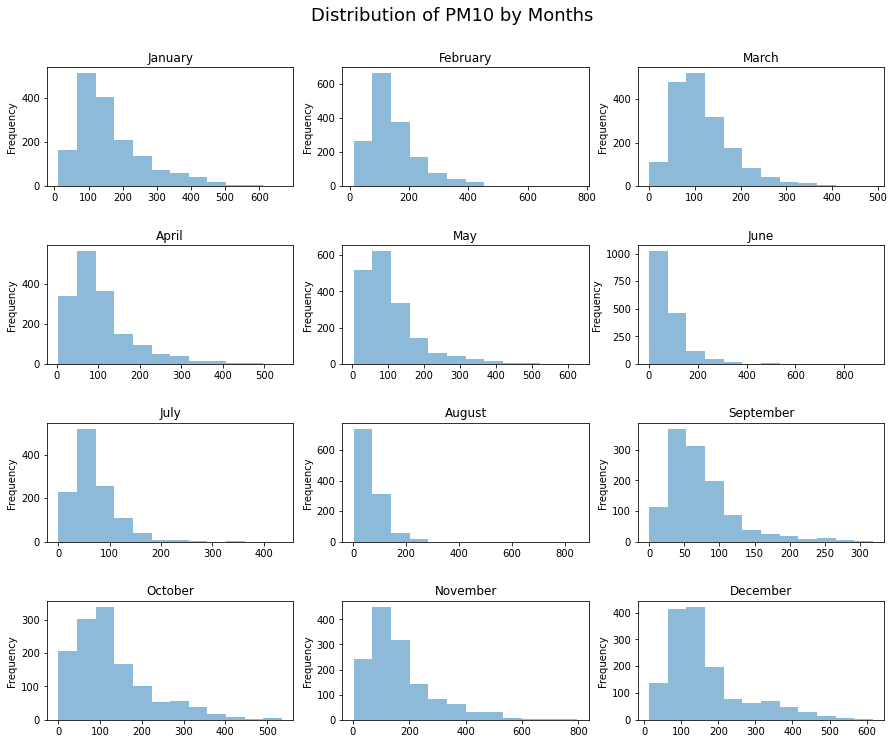

In [37]:
visualizedistribution('PM10')

Let's check whether helper function is working properly or not

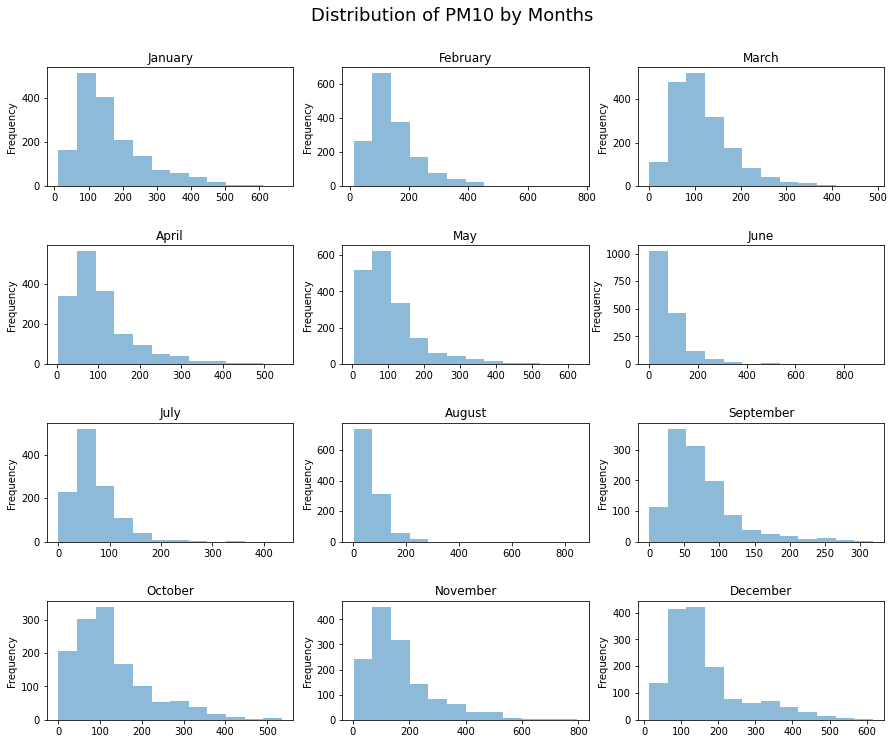

In [38]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of PM10 by Months", fontsize=18, y=0.95)

# loop through the length of month and keep track of index
for n, i in enumerate(new_city_day_df.month.unique()):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n + 1)

    # filter df and plot ticker on the new subplot axis
    new_city_day_df[new_city_day_df['month'] == i]['PM10'].plot.hist(bins=12, alpha=0.5, ax = ax)
    
    # chart formatting
    ax.set_title(i)

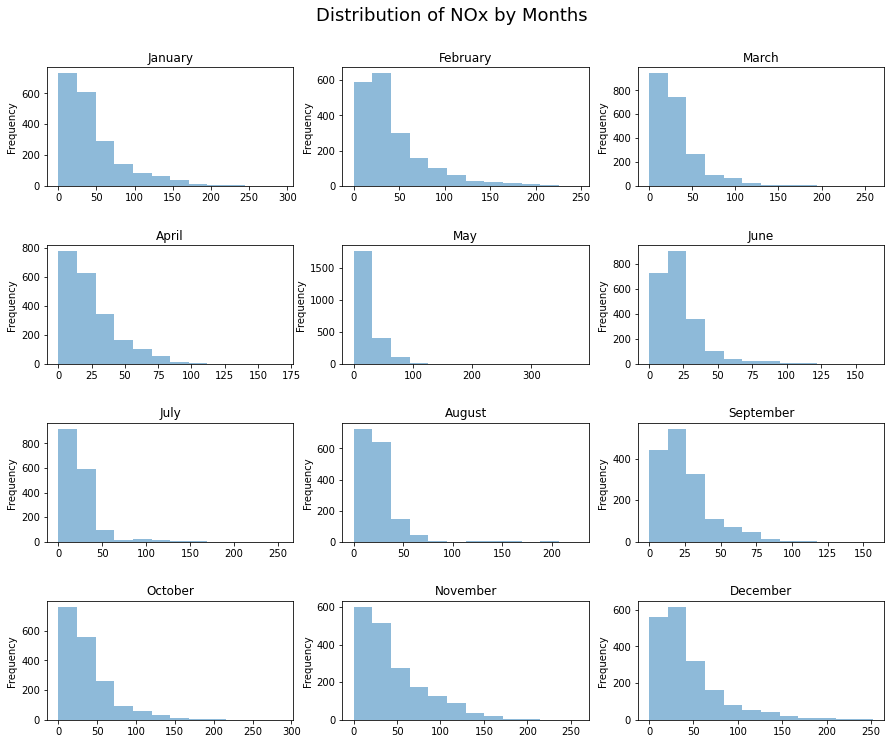

In [39]:
 visualizedistribution('NOx')

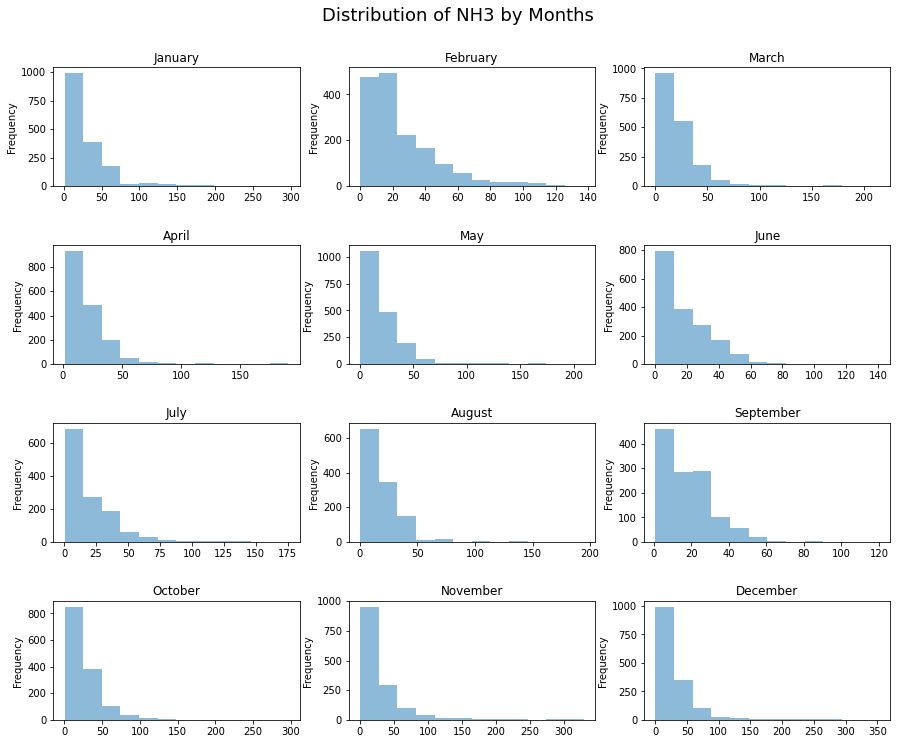

In [40]:
visualizedistribution('NH3')

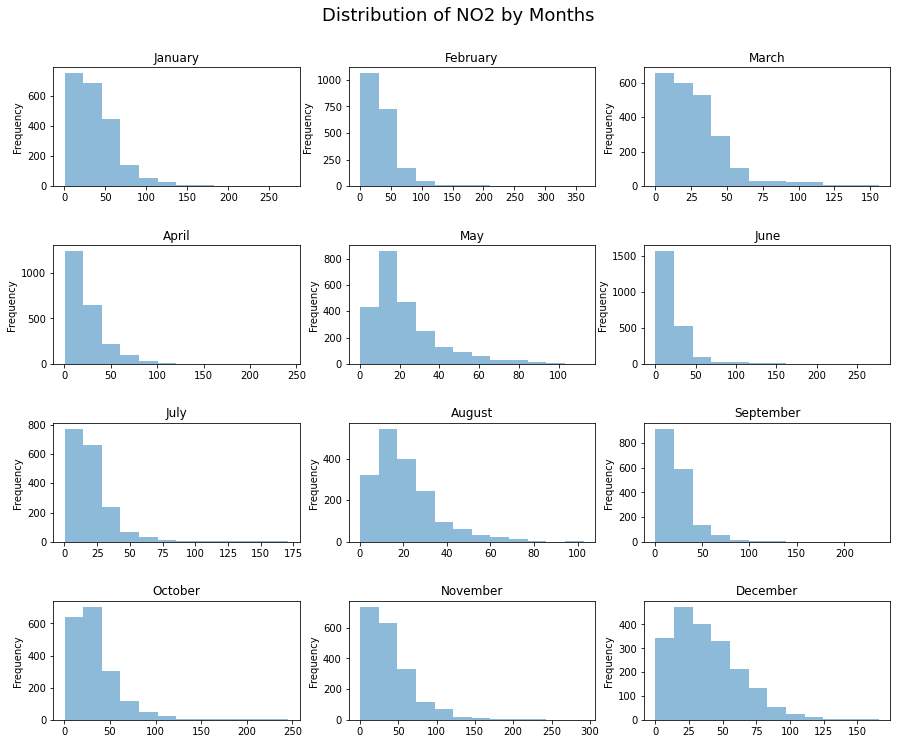

In [41]:
visualizedistribution('NO2')

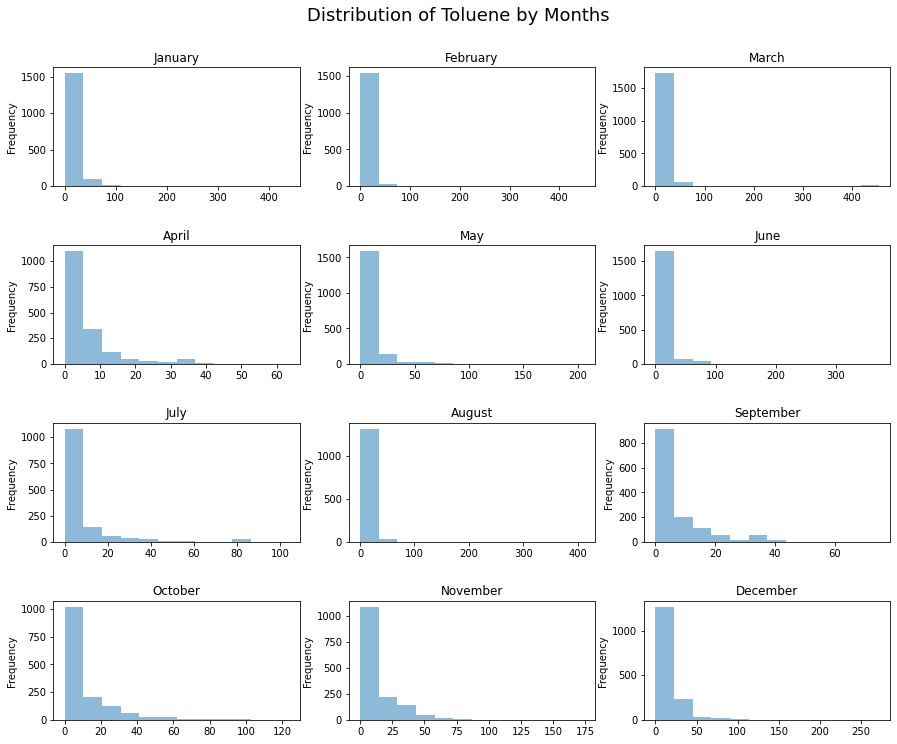

In [42]:
visualizedistribution('Toluene')

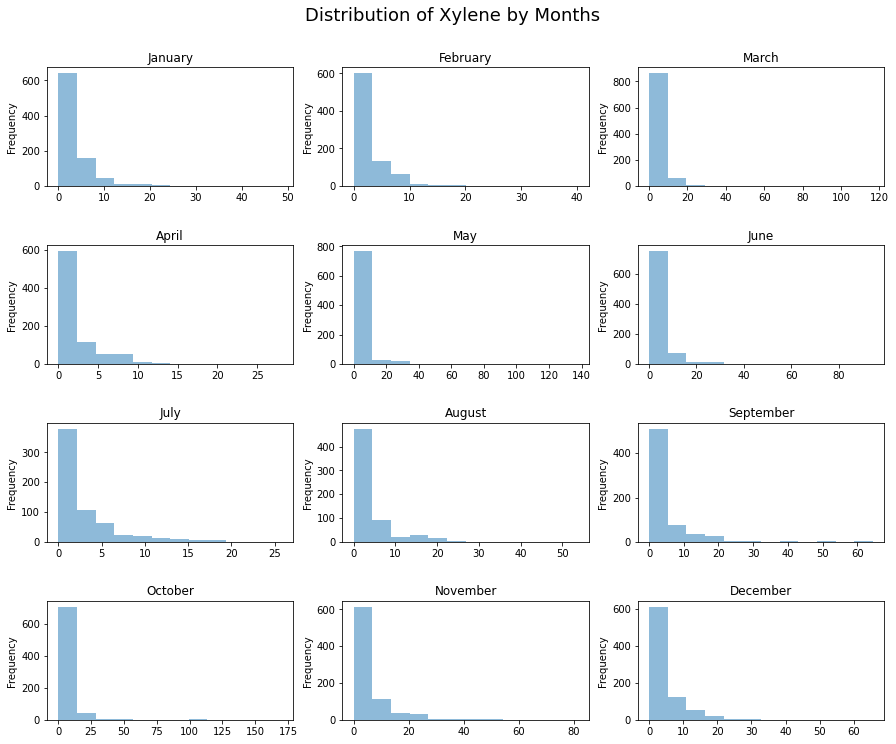

In [43]:
visualizedistribution("Xylene")

I think most of the column is `Positively Skewed` the best value to use to replace the columns are median or mode

In [44]:
new_city_day_df.isnull().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
year_month        0
month             0
Year              0
dtype: int64

What is the best value (median, mode) to approach to replace the value

In [45]:
#let's first try this on copy data of our new droped 'NA' rows of AirQuality
new_city_day_df_2 = new_city_day_df.copy()
print(new_city_day_df_2.shape)
new_city_day_df.shape

(24850, 19)


(24850, 19)

Approach to replace the null/NA value:
- Well we want mode/median of NA column over each month
- replace the NA value for the same column over the same period/month

```
#let's replace NA value with mode
def replaceNA(df):
    columns = [features for features in df.columns if df[features].isna().sum() > 0]
    for column in columns:
        periods = df.month.unique()
        for period in periods:
            df[df.month == period][column] = df[df.month == period][column].fillna(df[df.month == period][column].median())
```

replaceNA(new_city_day_df_2)

In [46]:
new_city_day_df_2.isna().sum()

City              0
Date              0
PM2.5           678
PM10           7086
NO              387
NO2             391
NOx            1857
NH3            6536
CO              445
SO2             605
O3              807
Benzene        3535
Toluene        5826
Xylene        15372
AQI               0
AQI_Bucket        0
year_month        0
month             0
Year              0
dtype: int64

In [47]:
NA_columns = [features for features in new_city_day_df_2.columns if new_city_day_df_2[features].isnull().sum() > 0]
print(NA_columns)

months = new_city_day_df_2.month.unique()
print(months)

['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']
['January' 'February' 'March' 'April' 'May' 'June' 'July' 'August'
 'September' 'October' 'November' 'December']


In [48]:
grp = new_city_day_df_2.groupby( by = ['month'])
grp.median()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
month,,,,,,,,,,,,,,
April,42.835,86.190,8.395,18.320,19.280,15.175,0.840,8.790,36.910,1.090,3.420,1.020,111.0,2019
August,29.830,56.160,8.840,17.310,20.240,13.870,0.870,7.660,19.400,0.900,3.100,1.000,85.0,2018
December,79.250,136.980,12.585,34.290,32.595,18.600,1.190,10.855,33.350,2.455,5.990,1.940,182.0,2018
February,65.715,127.160,12.770,28.990,30.480,18.200,1.015,10.330,36.360,1.310,3.675,1.370,149.5,2019
January,78.170,137.700,13.155,33.450,33.715,21.100,1.140,10.600,34.605,2.000,4.930,1.800,183.0,2019
July,30.220,57.945,8.740,16.545,19.240,13.095,0.790,7.550,21.470,0.620,2.375,1.010,86.0,2018
June,31.960,62.995,7.600,16.015,17.920,12.850,0.740,7.990,29.160,0.860,2.460,0.955,96.0,2019
March,51.770,103.620,9.580,23.820,24.805,16.005,0.870,9.905,35.520,1.370,3.610,1.170,124.0,2019
May,40.375,84.150,7.580,17.700,18.530,14.000,0.820,9.060,37.640,1.150,2.900,0.920,111.0,2019


In [49]:
#Let's try for PM10
med = new_city_day_df_2.groupby('month')['PM10'].median()
new_city_day_df_2['PM10'].fillna(new_city_day_df_2['month'].map(med), inplace = True)

In [50]:
new_city_day_df_2['PM10'].isna().sum()

0

In [51]:
print("Nan data\n", new_city_day_df[new_city_day_df['month'] == "February"]['PM10'])

print("Imputed median Value\n", new_city_day_df_2[new_city_day_df_2['month'] == "February"]['PM10'])

Nan data
 31          NaN
32          NaN
33          NaN
34          NaN
35          NaN
          ...  
29403     76.40
29404    107.91
29405     58.33
29406    117.11
29407    131.04
Name: PM10, Length: 2078, dtype: float64
Imputed median Value
 31       127.16
32       127.16
33       127.16
34       127.16
35       127.16
          ...  
29403     76.40
29404    107.91
29405     58.33
29406    117.11
29407    131.04
Name: PM10, Length: 2078, dtype: float64


So it is actually working over different months for their respective median() value

In [52]:
#Now let's aplly these to all the Nan Columns by month
#PM2.5
Value = new_city_day_df_2.groupby('month')['PM2.5'].median()
new_city_day_df_2['PM2.5'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)
#NO
Value = new_city_day_df_2.groupby('month')['NO'].median()
new_city_day_df_2['NO'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)
#NO2
Value = new_city_day_df_2.groupby('month')['NO2'].median()
new_city_day_df_2['NO2'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)
#NOx
Value = new_city_day_df_2.groupby('month')['NOx'].median()
new_city_day_df_2['NOx'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)
#NH3
Value = new_city_day_df_2.groupby('month')['NH3'].median()
new_city_day_df_2['NH3'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)
#CO
Value = new_city_day_df_2.groupby('month')['CO'].median()
new_city_day_df_2['CO'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)
#SO2
Value = new_city_day_df_2.groupby('month')['SO2'].median()
new_city_day_df_2['SO2'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)
#O3
Value = new_city_day_df_2.groupby('month')['O3'].median()
new_city_day_df_2['O3'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)
#Benzene
Value = new_city_day_df_2.groupby('month')['Benzene'].median()
new_city_day_df_2['Benzene'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)
#Toluene
Value = new_city_day_df_2.groupby('month')['Toluene'].median()
new_city_day_df_2['Toluene'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)
#Xylene
Value = new_city_day_df_2.groupby('month')['Xylene'].median()
new_city_day_df_2['Xylene'].fillna(new_city_day_df_2['month'].map(Value), inplace = True)

In [53]:
new_city_day_df_2.isna().sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
Xylene        0
AQI           0
AQI_Bucket    0
year_month    0
month         0
Year          0
dtype: int64

Now lets find "NA" in stations_day data and perform some cleaning

In [54]:
station_day.isna().sum()

StationId          0
StationName        0
City               0
State              0
Status           324
Date               0
PM2.5          21625
PM10           42706
NO             17106
NO2            16547
NOx            15500
NH3            48105
CO             12998
SO2            25204
O3             25568
Benzene        31455
Toluene        38702
Xylene         85137
AQI            21010
AQI_Bucket     21010
month              0
Year               0
year_month         0
dtype: int64

In [55]:
#Now let's drop NA value which doesn't have enough data to calculate.
station_drop_data = stations_day[station_day.AQI.isna() & (station_day['PM2.5'].isna() & station_day['PM10'].isna())]
station_drop_data

,StationId,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
162,AP001,2018-05-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,AP001,2018-05-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
296,AP001,2018-09-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
328,AP001,2018-10-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
329,AP001,2018-10-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107989,WB013,2020-05-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107990,WB013,2020-05-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107991,WB013,2020-05-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
107992,WB013,2020-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
station_day.drop(station_day[station_day.AQI.isna() & (station_day['PM2.5'].isna() & station_day['PM10'].isna())].index, inplace = True)

In [57]:
stations_day.shape[0] - station_day.shape[0] #Exact number of rows have been droped

17493

In [58]:
station_day[station_day.AQI.isnull()].index

Int64Index([     0,    117,    133,    138,    139,    145,    147,    150,
               151,    153,
            ...
            107276, 107279, 107287, 107593, 107762, 107763, 107764, 107885,
            107994, 107999],
           dtype='int64', length=3517)

In [59]:
station_day.drop(station_day[station_day.AQI.isna()].index, inplace = True)
station_day.drop(station_day[station_day.Status.isna()].index, inplace = True)

In [60]:
station_day.isnull().sum()

StationId          0
StationName        0
City               0
State              0
Status             0
Date               0
PM2.5           3487
PM10           23960
NO              2226
NO2             1508
NOx             4554
NH3            29815
CO              2895
SO2             9532
O3              9445
Benzene        19628
Toluene        26323
Xylene         67425
AQI                0
AQI_Bucket         0
month              0
Year               0
year_month         0
dtype: int64

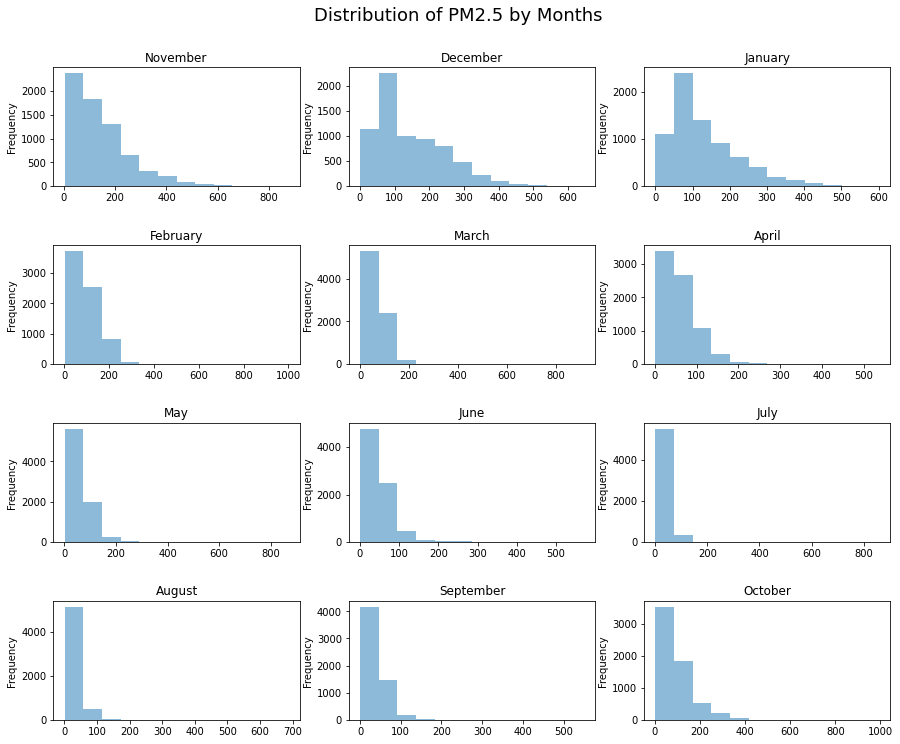

In [61]:
plt.figure(figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
plt.suptitle("Distribution of PM2.5 by Months", fontsize=18, y=0.95)

# loop through the length of tickers and keep track of index
for n, i in enumerate(station_day.Date.dt.month_name().unique()):
    # add a new subplot iteratively
    ax = plt.subplot(4, 3, n + 1)

    # filter df and plot ticker on the new subplot axis
    station_day[station_day['Date'].dt.month_name() == i]['PM2.5'].plot.hist(bins=12, alpha=0.5, ax = ax)

    # chart formatting
    ax.set_title(i)

In [62]:
station_day

,StationId,StationName,City,State,Status,Date,PM2.5,PM10,NO,NO2,...,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,month,Year,year_month
1,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-25,81.40,124.50,1.44,20.50,...,15.24,127.09,0.20,6.50,0.06,184.0,Moderate,November,2017,2017-11
2,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-26,78.32,129.06,1.26,26.00,...,26.96,117.44,0.22,7.95,0.08,197.0,Moderate,November,2017,2017-11
3,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-27,88.76,135.32,6.60,30.85,...,33.59,111.81,0.29,7.63,0.12,198.0,Moderate,November,2017,2017-11
4,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-28,64.18,104.09,2.56,28.07,...,19.00,138.18,0.17,5.02,0.07,188.0,Moderate,November,2017,2017-11
5,AP001,"Secretariat, Amaravati - APPCB",Amaravati,Andhra Pradesh,Active,2017-11-29,72.47,114.84,5.23,23.20,...,10.55,109.74,0.21,4.71,0.08,173.0,Moderate,November,2017,2017-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108030,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-27,8.65,16.46,NaN,NaN,...,4.36,30.59,1.32,7.26,NaN,50.0,Good,June,2020,2020-06
108031,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-28,11.80,18.47,NaN,NaN,...,3.49,38.95,1.42,7.92,NaN,65.0,Satisfactory,June,2020,2020-06
108032,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-29,18.60,32.26,13.65,200.87,...,5.12,38.17,3.52,8.64,NaN,63.0,Satisfactory,June,2020,2020-06
108033,WB013,"Victoria, Kolkata - WBPCB",Kolkata,West Bengal,Active,2020-06-30,16.07,39.30,7.56,29.13,...,5.88,29.64,1.86,8.40,NaN,57.0,Satisfactory,June,2020,2020-06


In [63]:
station_day.groupby(station_day['month']).median()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
month,,,,,,,,,,,,,,
April,50.160,109.790,7.500,22.30,22.900,22.820,0.84,9.670,40.825,1.10,3.28,0.460,125.0,2019
August,28.990,65.620,8.690,20.27,21.710,22.190,0.82,7.330,19.980,0.84,5.02,0.355,87.0,2018
December,112.290,189.490,19.930,39.90,43.260,28.810,1.26,10.100,28.150,3.07,8.82,0.850,266.0,2018
February,82.035,162.440,14.970,36.20,39.120,28.640,1.05,10.330,33.700,1.63,5.26,0.840,186.0,2019
January,104.020,174.600,16.900,38.82,41.410,28.710,1.16,10.090,28.400,2.31,7.28,0.720,247.0,2019
July,31.805,70.680,7.700,20.75,20.680,22.870,0.78,7.600,22.560,0.79,4.22,0.320,91.0,2018
June,39.755,91.115,6.250,19.94,19.915,19.980,0.72,7.520,32.730,1.08,3.53,0.380,106.0,2019
March,58.480,124.300,10.180,28.86,29.650,24.610,0.88,10.250,36.190,1.41,4.76,0.750,134.0,2019
May,49.130,123.265,7.070,22.79,21.965,21.840,0.84,9.125,41.190,1.20,3.79,0.470,132.0,2019


In [64]:
station_day.groupby('month')['PM10'].median()

month
April        109.790
August        65.620
December     189.490
February     162.440
January      174.600
July          70.680
June          91.115
March        124.300
May          123.265
November     194.100
October      150.210
September     71.230
Name: PM10, dtype: float64

In [65]:
#Now let's aplly these to all the Nan Columns by month
#PM10
Value = station_day.groupby('month')['PM10'].median()
station_day['PM10'].fillna(station_day['month'].map(Value), inplace = True)
#PM2.5
Value = station_day.groupby('month')['PM2.5'].median()
station_day['PM2.5'].fillna(station_day['month'].map(Value), inplace = True)
#NO
Value = station_day.groupby('month')['NO'].median()
station_day['NO'].fillna(station_day['month'].map(Value), inplace = True)
#NO2
Value = station_day.groupby('month')['NO2'].median()
station_day['NO2'].fillna(station_day['month'].map(Value), inplace = True)
#NOx
Value = station_day.groupby('month')['NOx'].median()
station_day['NOx'].fillna(station_day['month'].map(Value), inplace = True)
#NH3
Value = station_day.groupby('month')['NH3'].median()
station_day['NH3'].fillna(station_day['month'].map(Value), inplace = True)
#CO
Value = station_day.groupby('month')['CO'].median()
station_day['CO'].fillna(station_day['month'].map(Value), inplace = True)
#SO2
Value = station_day.groupby('month')['SO2'].median()
station_day['SO2'].fillna(station_day['month'].map(Value), inplace = True)
#O3
Value = station_day.groupby('month')['O3'].median()
station_day['O3'].fillna(station_day['month'].map(Value), inplace = True)
#Benzene
Value = station_day.groupby('month')['Benzene'].median()
station_day['Benzene'].fillna(station_day['month'].map(Value), inplace = True)
#Toluene
Value = station_day.groupby('month')['Toluene'].median()
station_day['Toluene'].fillna(station_day['month'].map(Value), inplace = True)
#Xylene
Value = station_day.groupby('month')['Xylene'].median()
station_day['Xylene'].fillna(station_day['month'].map(Value), inplace = True)

In [66]:
station_day.isnull().sum()

StationId      0
StationName    0
City           0
State          0
Status         0
Date           0
PM2.5          0
PM10           0
NO             0
NO2            0
NOx            0
NH3            0
CO             0
SO2            0
O3             0
Benzene        0
Toluene        0
Xylene         0
AQI            0
AQI_Bucket     0
month          0
Year           0
year_month     0
dtype: int64

Now that Data cleaning and replacing of value is done. Now we move forward to **Exploratory Data Analysis**

In [67]:
new_city_day_df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24850 entries, 28 to 29530
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        24850 non-null  object        
 1   Date        24850 non-null  datetime64[ns]
 2   PM2.5       24850 non-null  float64       
 3   PM10        24850 non-null  float64       
 4   NO          24850 non-null  float64       
 5   NO2         24850 non-null  float64       
 6   NOx         24850 non-null  float64       
 7   NH3         24850 non-null  float64       
 8   CO          24850 non-null  float64       
 9   SO2         24850 non-null  float64       
 10  O3          24850 non-null  float64       
 11  Benzene     24850 non-null  float64       
 12  Toluene     24850 non-null  float64       
 13  Xylene      24850 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
 16  year_month  24850 non

Now, let's look at the number of cities data is collected from

In [68]:
new_city_day_df_2.City.nunique()

26

In [69]:
new_city_day_df.City.unique()

array(['Ahmedabad', 'Aizawl', 'Amaravati', 'Amritsar', 'Bengaluru',
       'Bhopal', 'Brajrajnagar', 'Chandigarh', 'Chennai', 'Coimbatore',
       'Delhi', 'Ernakulam', 'Gurugram', 'Guwahati', 'Hyderabad',
       'Jaipur', 'Jorapokhar', 'Kochi', 'Kolkata', 'Lucknow', 'Mumbai',
       'Patna', 'Shillong', 'Talcher', 'Thiruvananthapuram',
       'Visakhapatnam'], dtype=object)

In [70]:
city = new_city_day_df_2.City.value_counts()
city.sort_values(ascending = False)

Delhi                 1999
Bengaluru             1910
Lucknow               1893
Chennai               1884
Hyderabad             1880
Patna                 1459
Gurugram              1453
Ahmedabad             1334
Visakhapatnam         1171
Amritsar              1126
Jaipur                1094
Thiruvananthapuram    1052
Amaravati              841
Mumbai                 775
Jorapokhar             771
Kolkata                754
Brajrajnagar           713
Talcher                698
Guwahati               495
Coimbatore             344
Chandigarh             299
Bhopal                 278
Shillong               205
Kochi                  158
Ernakulam              153
Aizawl                 111
Name: City, dtype: int64

In [71]:
new_city_day_df_2.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Year
count,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000,24850.000000
mean,66.891989,111.366165,17.492449,28.865929,31.668928,21.752109,2.321185,14.236186,34.779527,3.161853,8.177242,2.216589,166.463581,2018.082575
std,62.375770,78.206262,22.271348,24.460769,29.665610,22.522784,7.013868,17.234781,21.413923,14.870888,18.440476,4.321096,140.696585,1.481703
min,0.040000,0.030000,0.030000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000,2015.000000
25%,29.560000,60.690000,5.720000,12.090000,14.030000,11.280000,0.590000,5.790000,19.530000,0.340000,1.580000,0.955000,81.000000,2017.000000
50%,48.425000,93.480000,9.820000,22.015000,23.340000,15.745000,0.940000,9.190000,31.305000,1.280000,3.440000,1.170000,118.000000,2018.000000
75%,79.760000,136.980000,19.710000,37.910000,38.170000,24.710000,1.460000,14.890000,45.397500,2.850000,7.380000,1.980000,208.000000,2019.000000
max,914.940000,917.080000,390.680000,362.210000,378.240000,352.890000,175.810000,186.080000,257.730000,455.030000,454.850000,170.370000,2049.000000,2020.000000


For the most of data max value is vey high, let's find whether this values are invalid or related to exponential trend.

In [72]:
new_city_day_df_2.groupby(['Year','month']).max()

City       Date   PM2.5    PM10      NO     NO2  \
Year month                                                                
2015 April           Lucknow 2015-04-30  158.32  336.63   59.44   88.61   
     August          Lucknow 2015-08-31  299.25  260.48   50.39   56.15   
     December          Patna 2015-12-31  645.50  589.93  200.37  140.09   
     February          Delhi 2015-02-28  239.96  497.37   81.47   67.00   
     January           Delhi 2015-01-31  313.22  607.98   69.16   56.70   
...                      ...        ...     ...     ...     ...     ...   
2020 January   Visakhapatnam 2020-01-31  378.08  489.02  178.12  104.77   
     July      Visakhapatnam 2020-07-01   61.64  174.08   44.50   35.04   
     June      Visakhapatnam 2020-06-30  131.88  486.99  102.83   58.92   
     March     Visakhapatnam 2020-03-31  131.31  276.26  270.09   72.38   
     May       Visakhapatnam 2020-05-31  107.05  311.98  390.68   58.99   

                  NOx     NH3     CO     SO2      O3  Benzene  Toluene  \
Year month                                                               
2015 April     108.55   44.66  30.80  100.48  157.20    47.26    49.56   
     August    225.79   52.02  48.07   22.81   99.03   287.49   411.52   
     December  251.96  352.89  30.44   34.05  139.79    37.16    67.55   
     February  131.32  137.27  77.70  101.53  107.38    50.61   163.64   
     January   110.59  166.70  24.39   67.39  111.33    14.36    24.86   
...               ...     ...    ...     ...     ...      ...      ...   
2020 January   224.09  133.25  36.16  100.04  156.05   438.01   437.77   
     July       57.72   36.63   2.10   20.77   53.68     7.79    47.05   
     June      108.29   59.20   2.85   37.25  142.20    81.92    82.01   
     March     218.54  113.55  23.13  119.95  116.25   455.03   454.85   
     May       378.24   50.89   2.54   37.37  127.98   205.43   205.43   

               Xylene     AQI    AQI_Bucket year_month  
Year month                                              
2015 April      28.13   774.0     Very Poor    2015-04  
     August      1.00   390.0     Very Poor    2015-08  
     December    3.11   586.0     Very Poor    2015-12  
     February   35.61  1247.0     Very Poor    2015-02  
     January     9.84   514.0     Very Poor    2015-01  
...               ...     ...           ...        ...  
2020 January    10.65   660.0     Very Poor    2020-01  
     July        8.82   157.0  Satisfactory    2020-07  
     June       13.19   478.0        Severe    2020-06  
     March     116.62   988.0     Very Poor    2020-03  
     May       137.45   256.0  Satisfactory    2020-05  

[67 rows x 17 columns]

Well looks like the max value is not wrong there seems to be certain trend in of max value in Summer and at winter from 2015-19, but for 2020 because of covid there is certain drop.

In [73]:
plt.rcParams["figure.figsize"] = [12, 6]
plt.rcParams["figure.autolayout"] = True

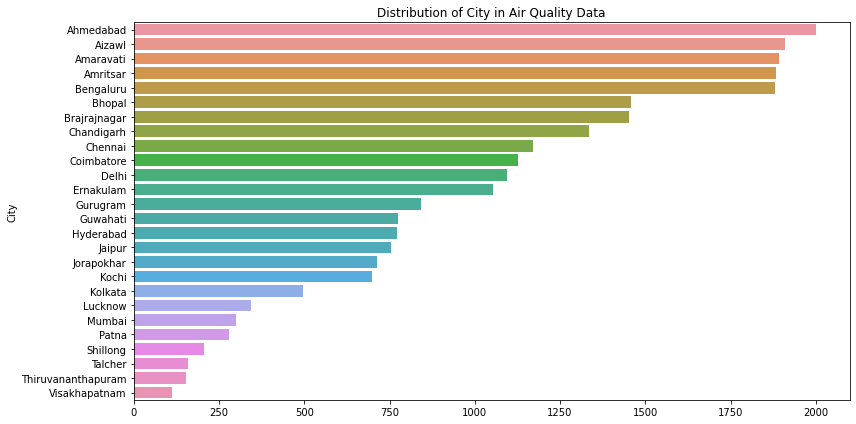

In [74]:
plt.figure(figsize = (12,6))
plt.title("Distribution of City in Air Quality Data")
plt.ylabel("City",)
ax = sns.barplot(x = city, y = city.index.sort_values(ascending = True))
ax.set(xlabel = None);
#increase font size of all elements;

In [75]:
#Date Column

In [76]:
date_trend = new_city_day_df_2.Date.dt.year.value_counts().sort_values()
date_trend

2015    1827
2016    2573
2017    3234
2020    4421
2018    5724
2019    7071
Name: Date, dtype: int64

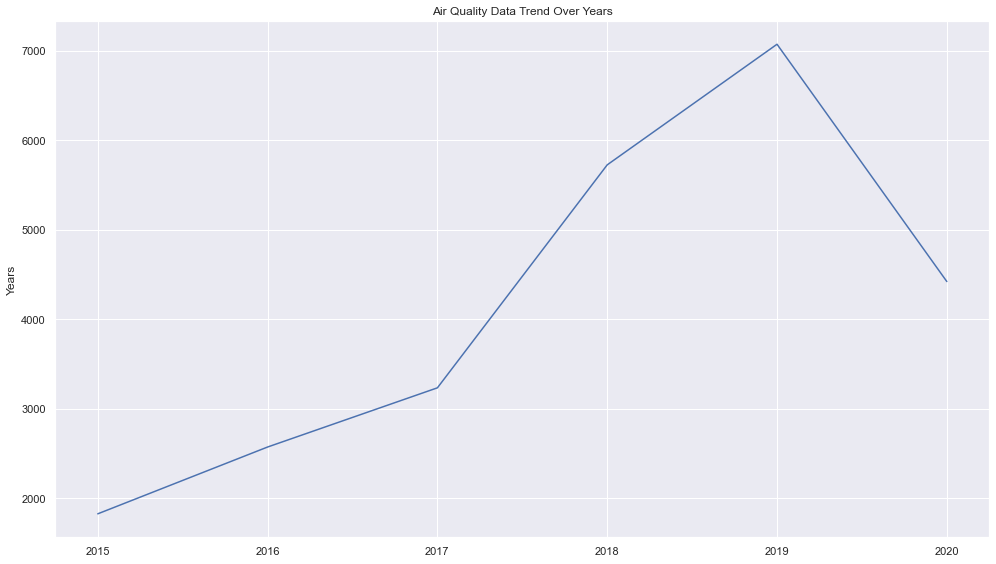

In [216]:
sns.lineplot(y = date_trend, x = date_trend.index).set(xlabel = None)
plt.ylabel("Years")
plt.title("Air Quality Data Trend Over Years");

Looks like there was some malfunction/ maintenance problem with stations because of COVID-19

**Let's understand these pollutants and their sources**
- `PM2.5, PM10 particulate matter` : Coarse (bigger) particles, called PM10, can irritate your eyes, nose, and throat. Dust from roads, farms, dry riverbeds, construction sites, and mines are types of PM10. Fine (smaller) particles, called PM2.5, are more dangerous because they can get into the deep parts of your lungs.
- Nitrogen Dioxide (NO2), Nitrogen oxides (NOx) primarily gets in the air from the burning of fuel. NO2 forms from emissions from cars, trucks and buses, power plants, and off-road equipment.
- NH3 is poisonous if inhaled in great quantities and is irritating to the eyes, nose, and throat in lesser amounts. It combines in the atmosphere with sulphates and nitrates to form secondary fine particulate matter (PM2.5). PM 2.5 is known to have harmful effects on human health and the environment.

In [245]:
#PM2.5 particulaye matter, let's visualize it's distribution over different cities
new_city_day_df_2['PM2.5'].value_counts().index
val = new_city_day_df['PM2.5'].value_counts().values
val
cit = new_city_day_df_2['City'].value_counts().index
cit

Index(['Delhi', 'Bengaluru', 'Lucknow', 'Chennai', 'Hyderabad', 'Patna',
       'Gurugram', 'Ahmedabad', 'Visakhapatnam', 'Amritsar', 'Jaipur',
       'Thiruvananthapuram', 'Amaravati', 'Mumbai', 'Jorapokhar', 'Kolkata',
       'Brajrajnagar', 'Talcher', 'Guwahati', 'Coimbatore', 'Chandigarh',
       'Bhopal', 'Shillong', 'Kochi', 'Ernakulam', 'Aizawl'],
      dtype='object')

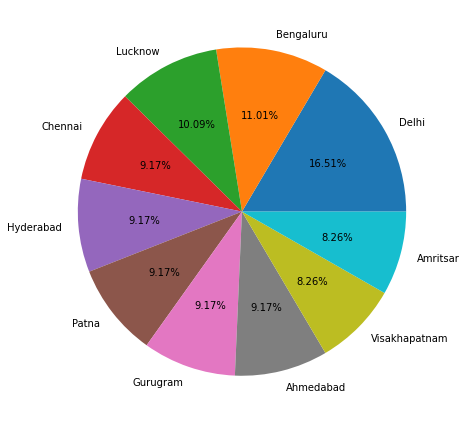

In [79]:
#Top 10 City that has most pollutants
plt.pie(val[:10], labels = cit[:10], autopct = '%1.2f%%');

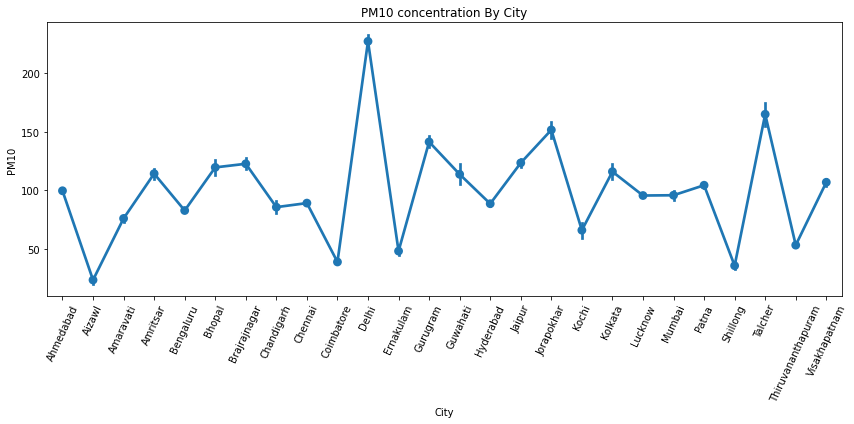

In [80]:
#PM10
sns.pointplot(data = new_city_day_df_2, x = 'City', y = 'PM10')
plt.xticks(rotation=65)
plt.title("PM10 concentration By City");

The largest source of NH3 emissions is agriculture, including animal husbandry and NH3-based fertilizer applications.

In [81]:
new_city_day_df_2.Year.value_counts()

2019    7071
2018    5724
2020    4421
2017    3234
2016    2573
2015    1827
Name: Year, dtype: int64

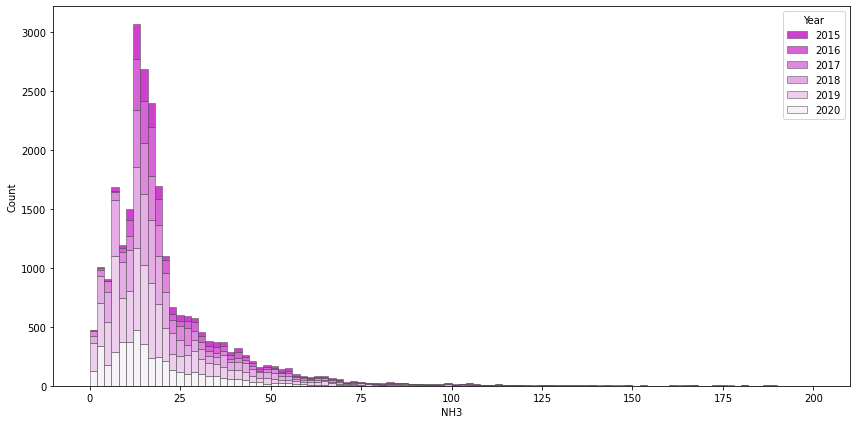

In [82]:
sns.histplot(data = new_city_day_df_2, x = 'NH3', hue = 'Year', binwidth= 2, binrange= [0, 200],
            multiple="stack", palette="light:m_r", edgecolor=".3", linewidth=.5);

Looks like there is certain drop in the emission of NH3 because it is rainy season and India is a tropical country

Atmospheric chemistry and transport
The primary pollutant, directly emitted, is nitric oxide (NO), together with a small proportion of nitrogen dioxide (NO2). NO is oxidised by ozone in the atmosphere, on a time scale of tens of minutes, to give NO2. In rural air, away from sources of NO, most of the nitrogen oxides in the atmosphere are in the form of NO2. NO and NO2 are collectively known as NOx because they are rapidly inter-converted during the day. NO2 is split up by UV light to give NO and an O atom, which combines with molecular oxygen (O2) to give ozone (O3). Therefore, during the day NO, NO2 and ozone exist in a quasi-equilibrium which depends on the amount of sunlight. Eventually, NO2 is oxidised to nitric acid (HNO3, vapour) which is absorbed directly at the ground, is converted into nitrate-containing particles, or dissolves in cloud droplets. At night, different oxidation processes convert NO2 to nitrates.

In [83]:
new_city_day_df_2[['NO', 'NO2', 'NOx']]

,NO,NO2,NOx
28,6.93,28.71,33.72
29,13.85,28.68,41.08
30,24.39,32.66,52.61
31,43.48,42.08,84.57
32,54.56,35.31,72.80
...,...,...,...
29526,7.68,25.06,19.54
29527,3.42,26.06,16.53
29528,3.45,29.53,18.33
29529,4.05,29.26,18.80


In [84]:
# Maximum NO, NO2, NOx
new_city_day_df_2.groupby(['City'])['NO', 'NO2', 'NOx'].agg(['min', 'max']).reset_index()

C:\Users\MOHIT\Anaconda3\envs\6.86x\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



City    NO            NO2            NOx         
                         min     max    min     max    min      max
0            Ahmedabad  0.06  175.81   0.08  292.02   2.75  246.030
1               Aizawl  2.90   20.36   0.05    2.32   3.41   25.150
2            Amaravati  0.25   43.76   1.52  140.17   0.86  103.490
3             Amritsar  0.40  103.44   0.79  237.27   6.29  150.960
4            Bengaluru  0.46   95.19   3.00  142.35   0.00  147.060
5               Bhopal  0.59   30.94   4.25   75.67   3.05   59.010
6         Brajrajnagar  0.03  390.68   0.49   37.39   0.00  378.240
7           Chandigarh  0.44   70.94   2.47   52.22   3.66   70.530
8              Chennai  1.76   59.44   3.73  112.29   4.86   77.570
9           Coimbatore  0.19   87.90   0.09   83.07   0.00   85.260
10               Delhi  3.57  221.03  10.63  162.50   0.00  254.800
11           Ernakulam  0.06  152.12   0.06   28.99   0.92  156.210
12            Gurugram  0.09  287.14   0.65  362.21   0.00  287.890
13            Guwahati  0.55   92.84   3.45   43.42   2.17  184.730
14           Hyderabad  1.22   40.11   0.62   92.33   0.00   69.420
15              Jaipur  0.44  100.51   0.01  118.92   6.04  135.910
16          Jorapokhar  6.15   27.48   6.00   39.59  17.92   33.715
17               Kochi  1.19  270.09   0.01   67.73   0.00  218.540
18             Kolkata  0.47  197.73   5.08  150.01   8.07  293.100
19             Lucknow  0.11  156.78   0.97  121.80   2.21  168.230
20              Mumbai  4.55  128.76   2.49  106.27  15.50  168.540
21               Patna  0.70  221.41   0.66  266.46   0.00  259.540
22            Shillong  0.29   12.81   0.95   27.43   0.00    1.580
23             Talcher  0.44  268.03   0.02   99.80   0.00  228.960
24  Thiruvananthapuram  0.52   31.49   1.35   30.54   1.00   38.700
25       Visakhapatnam  0.40   90.84   0.17  130.26   0.00  117.990

Let's visualize distribution of 
- For CO(Carbon Monooxide) and O3(Ozone) the maximum value in last 8-hrs is used.

In [85]:
co_o3 = pd.DataFrame(new_city_day_df_2.groupby(['City', 'Year'])['CO', 'O3'].mean().reset_index())
co_o3

C:\Users\MOHIT\Anaconda3\envs\6.86x\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,City,Year,CO,O3
0,Ahmedabad,2015,12.360076,30.018251
1,Ahmedabad,2016,15.052991,19.580085
2,Ahmedabad,2017,29.006957,52.607681
3,Ahmedabad,2018,33.322241,37.508431
4,Ahmedabad,2019,25.856619,46.660866
...,...,...,...,...
93,Visakhapatnam,2016,1.100659,43.554371
94,Visakhapatnam,2017,1.111572,52.304528
95,Visakhapatnam,2018,0.718589,37.874064
96,Visakhapatnam,2019,0.860147,33.361173


No handles with labels found to put in legend.


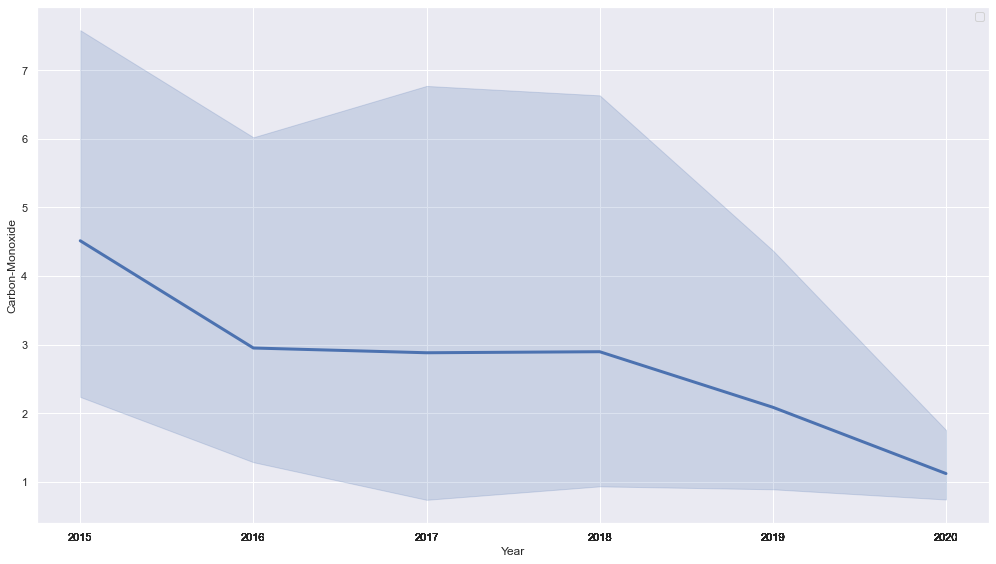

In [86]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(14,8)})

ax = sns.lineplot(data=co_o3, x =co_o3.Year, y = 'CO',
                  legend='full', lw=3)

ax.xaxis.set_major_locator(ticker.MultipleLocator(4))
plt.legend(bbox_to_anchor=(1, 1))
plt.ylabel('Carbon-Monoxide')
plt.xlabel('Year')
plt.xticks(co_o3.Year)
plt.show()

In [87]:
#Benzene Toluene & Xylene

`Benzene, toluene, m/p-xylene and o-xylene (BTX)` are toxic volatile organic compounds and ubiquitous air pollutants. Smoking and consumer products are indoor sources of BTX, whereas traffic and industrial activities are primary sources contributing to outdoor levels of BTX.

In [88]:
btx = new_city_day_df_2.groupby(['Year', 'month', 'year_month'])['Benzene','Toluene','Xylene'].mean().reset_index()
btx

C:\Users\MOHIT\Anaconda3\envs\6.86x\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Year,month,year_month,Benzene,Toluene,Xylene
0,2015,April,2015-04,3.170000,5.735385,1.948047
1,2015,August,2015-08,5.333602,11.154785,0.703656
2,2015,December,2015-12,2.487240,6.985519,1.635574
3,2015,February,2015-02,6.168868,15.927547,6.828491
4,2015,January,2015-01,4.809412,9.950882,3.860588
...,...,...,...,...,...,...
62,2020,January,2020-01,5.418868,10.272504,1.760438
63,2020,July,2020-07,1.202917,5.500833,1.525833
64,2020,June,2020-06,2.369891,5.567391,1.414307
65,2020,March,2020-03,12.092124,16.383112,1.945223


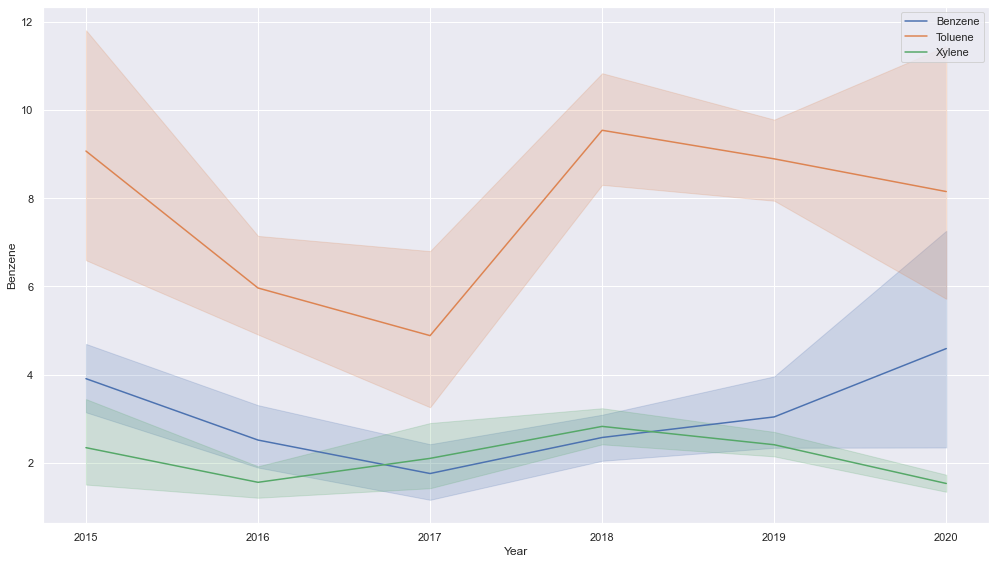

In [89]:
labels = ['Benzene', 'Toluene', 'Xylene']
ax = sns.lineplot(data = btx, x = 'Year', y = 'Benzene')
ax = sns.lineplot(data = btx, x = 'Year', y = 'Toluene')
ax = sns.lineplot(data = btx, x = 'Year', y = 'Xylene')
ax.legend(labels);

Questions :
1. Why distribution of data is low for city like Mumbai, Delhi, Gurugram, Patna, Thiruvanathapuram look for number of stations.
2. Why distribution droped in 2020?
3. What is Distribution of Vehicular pollution?
4. visulaize the number of stations added every year by state
5. what is the trend of Benzene, Toluene and Xylene as a industry pollutant?
6. What was trend of AQI by state over the year?
7. What period of the year AQI is very high and in which region?
8. 

In [90]:
#1. Why distribution of data is low for city like Mumbai, Delhi, Gurugram, Patna, Thiruvanathapuram look for number of stations.
station_day.Date.dt.year.value_counts()

2019    30291
2018    22783
2020    17609
2017     6595
2016     5151
2015     4285
Name: Date, dtype: int64

In [242]:
station_date_trend = station_day.groupby(['Year', 'Status'])['StationId'].count().reset_index()
station_date_trend.rename(columns = {'StationId' : 'Counts'}, inplace = True)
station_date_trend

,Year,Status,Counts
0,2015,Active,4285
1,2016,Active,5151
2,2017,Active,6460
3,2017,Inactive,135
4,2018,Active,22192
5,2018,Inactive,591
6,2019,Active,29752
7,2019,Inactive,539
8,2020,Active,17609


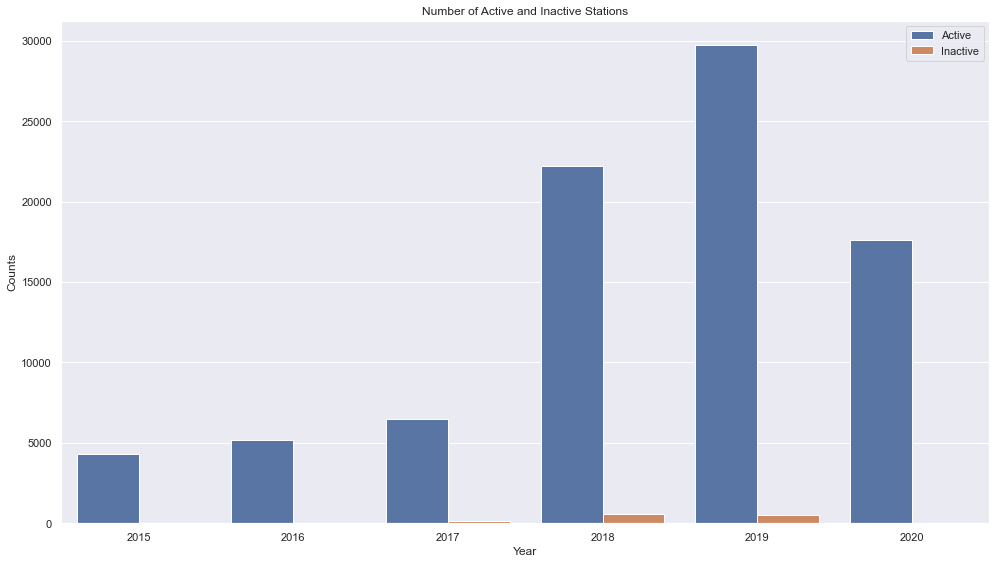

In [92]:
ax = sns.barplot(data = station_date_trend, x = 'Year', y = 'Counts', hue = 'Status')
ax.legend(loc='upper right')
plt.title('Number of Active and Inactive Stations');

**Observation**
- The Number of Station is increasing by every year till 2019.
- For the year `2020` we don't have any data on inactive stations may be because of COVID some station may neede manual attention.

In [241]:
#2. By what percent distribution droped for 2020
station = station_day.groupby(['State', 'Year'])['StationId'].count()
station

State           Year
Andhra Pradesh  2016     167
                2017     196
                2018     638
                2019     650
                2020     361
                        ... 
Uttar Pradesh   2019    1403
                2020     722
West Bengal     2018     260
                2019    1511
                2020    1225
Name: StationId, Length: 87, dtype: int64

3. What is Distribution of Vehicular pollution?

    Nitrogen Dioxide (NO2), Nitrogen oxides (NOx) primarily gets in the air from the burning of fuel. NO2 forms from emissions from cars, trucks and buses, power plants, and off-road equipment.
    
    Pollutants produced by vehicle exhausts include carbon monoxide, hydrocarbons, nitrogen oxides, particles, volatile organic compounds and sulfur dioxide. Hydrocarbons and nitrogen oxides react with sunlight and warm temperatures to form ground-level ozone.

**Vehicular pollutants**
Automotive vehicles emit several pollutants depending upon the quality
of the fuel they consume and engine efficiency. The release of pollutants from
vehicles also include fugitive emissions of the fuel and the source and level of
these emissions depending upon the vehicle type, its maintenance, etc. The
major pollutants released as vehicle/fuel emissions are, carbon monoxide (CO),
nitrogen oxides (NOx), photochemical oxidants, air toxics, namely benzene
(C6H6), aldehydes, 1,3 butadiene (C4H6), lead (Pb), particulate matter (PM),
hydrocarbon (HC), oxides of sulphur (SO2) and polycyclic aromatic
hydrocarbons (PAHs). While the predominant pollutants in petrol/gasoline
driven vehicles are hydrocarbons and carbon monoxide, the predominant
pollutants from the diesel based vehicles are Oxides of nitrogen and
particulates.

In [94]:
station_day.columns

Index(['StationId', 'StationName', 'City', 'State', 'Status', 'Date', 'PM2.5',
       'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene',
       'Toluene', 'Xylene', 'AQI', 'AQI_Bucket', 'month', 'Year',
       'year_month'],
      dtype='object')

In [206]:
vehicular_population = station_day[['year_month', 'NO', 'NO2', 'NOx', 'CO', 'PM2.5', 'SO2']]
vehicular_population = vehicular_population.groupby(['year_month']).mean()
vehicular_population

,NO,NO2,NOx,CO,PM2.5,SO2
year_month,,,,,,
2015-01,14.733846,23.200154,35.108308,6.833846,172.758154,10.404769
2015-02,20.409383,26.353704,42.481975,12.458889,142.749753,26.360988
2015-03,14.044255,23.662837,31.231418,8.587305,91.271986,19.710709
2015-04,14.219296,32.668058,38.786286,5.640534,75.174563,15.560583
2015-05,19.344087,36.986652,46.205185,5.937022,75.191022,14.963739
...,...,...,...,...,...,...
2020-03,17.246039,27.878189,34.146604,0.908447,48.717866,11.476454
2020-04,9.510495,16.744790,19.176763,0.723277,36.794140,10.930849
2020-05,10.538233,18.153939,20.752180,0.708563,38.039707,10.992015


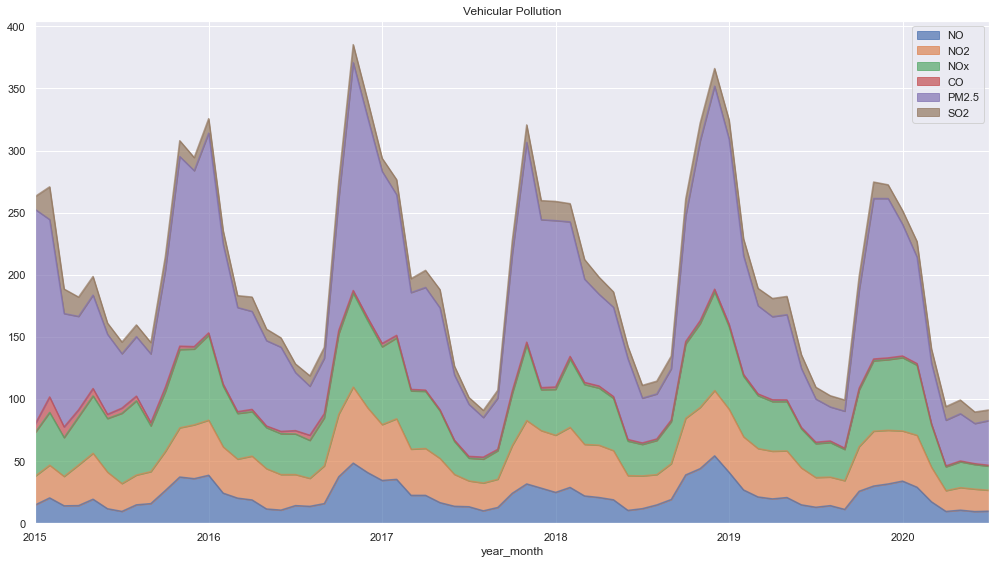

In [207]:
vehicular_population.plot(kind='area', title="Vehicular Pollution", alpha = 0.7, stacked = True );

  Q6 -  What is the total PM2.5 over the year by every state, since it's hazardous visualize it's contibution by state?

In [213]:
fig = px.treemap(station_day, 
                 path=['Country','State', 'City', 'StationName'], 
                 values='PM2.5',
                 color='AQI', 
                 color_continuous_scale='burg')
fig.show()

Q7 what number of stations given to every state over the year?

In [243]:
station_over_period = station_day.groupby(['State', 'City', 'Year'])['StationId'].nunique().reset_index()
station_over_period.rename(columns = {'StationId' : 'Counts'}, inplace = True)
station_over_period

,State,City,Year,Counts
0,Andhra Pradesh,Amaravati,2017,1
1,Andhra Pradesh,Amaravati,2018,1
2,Andhra Pradesh,Amaravati,2019,1
3,Andhra Pradesh,Amaravati,2020,1
4,Andhra Pradesh,Visakhapatnam,2016,1
...,...,...,...,...
91,Uttar Pradesh,Lucknow,2019,5
92,Uttar Pradesh,Lucknow,2020,4
93,West Bengal,Kolkata,2018,2
94,West Bengal,Kolkata,2019,7


In [244]:
fig = px.sunburst(station_over_period, 
                 path=['State', 'City', 'Year'], 
                 values= 'Counts',
                 color='Counts', 
                 color_continuous_scale='RdBu')
fig.show()